In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import matplotlib 

from scipy.constants import physical_constants
mc2 = physical_constants['electron mass energy equivalent in MeV'][0]*1e6  # m_e c^2 in [eV] 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from distgen.generator import Generator

from gpt import GPT
from gpt.gpt_distgen import run_gpt_with_distgen
from gpt.gpt_distgen import phase_gpt_with_distgen

from pmd_beamphysics import single_particle

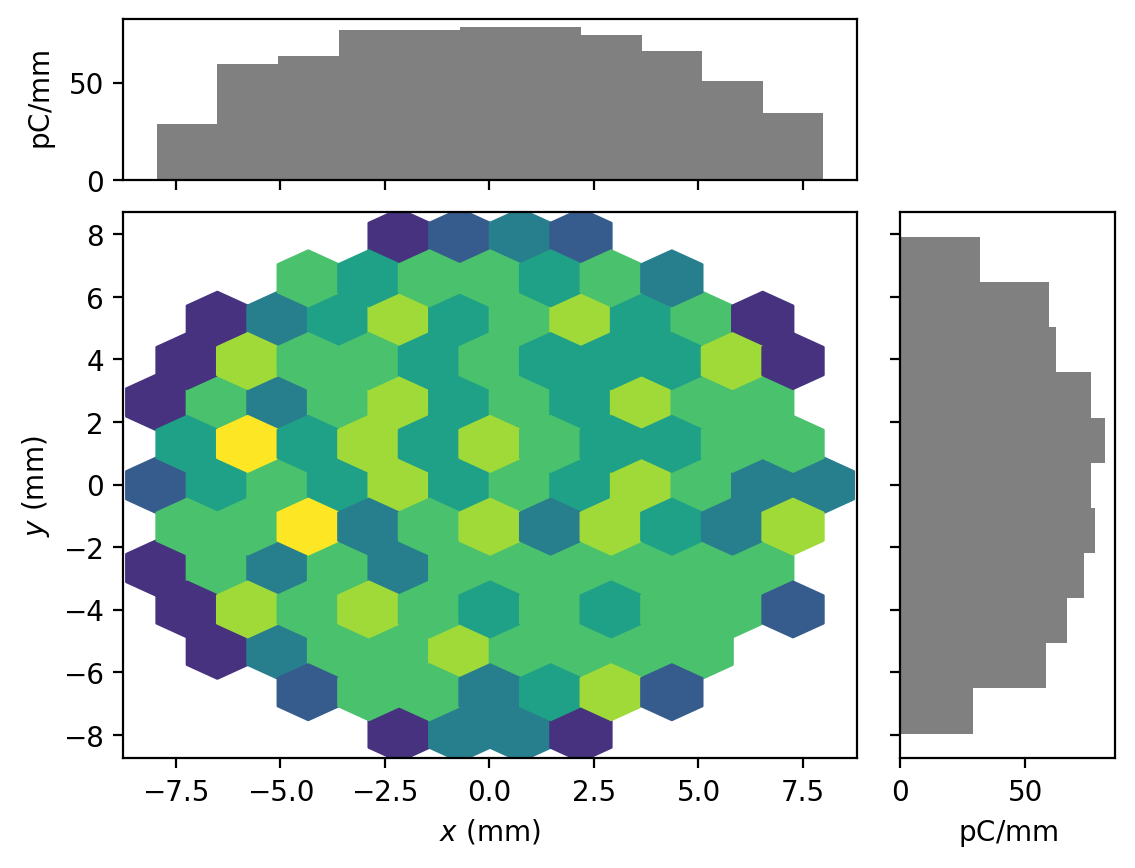

In [3]:
gen = Generator('templates/cu_injector/distgen.in.yaml')
gen['n_particle']=500
gen.run()
gen.particles.plot('x', 'y')
pg = gen.particles

In [4]:
centroid = single_particle(x =pg['mean_x'], y =pg['mean_y'],  z=pg['mean_z'],
                           px=pg['mean_x'], py=pg['mean_y'], pz=pg['mean_pz'], t = pg['mean_t'])

centroid['p']/mc2 - 0.00043286905408703526

#0.00043286905408703526

array([-5.42101086e-20])

In [5]:
settings={
          'Ntout':500,
          'gun_voltage':400,
          'buncher_voltage':50,
          'phiCTB01_off':-90, 
          'cavity_1_voltage':1000,
          'cavity_2_voltage':1000,
          'cavity_3_voltage':1000,
          'cavity_4_voltage':1000,
          'cavity_5_voltage':1000,
          'A3Quad_1_current':3,
          'A3Quad_2_current':-3,
          'A3Quad_3_current':3
         }

In [6]:
G = GPT('templates/cu_injector/gpt.in', initial_particles=centroid, verbose=True, parse_layout=False)
G.set_variables(settings);

   Initial 1 particles written to "/var/folders/jf/c053b9m10035hkwq4wd3bzhr0000gn/T/tmpx79ug305/gpt.particles.gdf"
GPT.configure_gpt:
   Original input file "gpt.in" in "/Users/colwyngulliford/GitHub/lume-gpt/examples/templates/cu_injector"
   Configured to run in "/var/folders/jf/c053b9m10035hkwq4wd3bzhr0000gn/T/tmpx79ug305"


In [7]:
G.auto_phase()


Auto Phasing >------

****> Creating intiial distribution for phasing...
writing 1 particles to /var/folders/jf/c053b9m10035hkwq4wd3bzhr0000gn/T/tmpx79ug305/gpt_particles.phasing.gdf
<**** Created intiial distribution for phasing.

   Writing gpt input file to "/var/folders/jf/c053b9m10035hkwq4wd3bzhr0000gn/T/tmpx79ug305/gpt.in"

Phasing: /var/folders/jf/c053b9m10035hkwq4wd3bzhr0000gn/T/tmpx79ug305/gpt.in
 
Cavity 0: Bracketed between 120 and 160
Cavity 0: Best phase = 133.43209822761364, final gamma = 1.784574019
 
Cavity 1: Bracketed between 20 and 60
Cavity 1: Best phase = 49.941093981791056, final gamma = 3.490943427
 
Cavity 2: Bracketed between 0 and 40
Cavity 2: Best phase = 23.54303114853647, final gamma = 5.383492167
 
Cavity 3: Bracketed between 260 and 300
Cavity 3: Best phase = 272.09181181464726, final gamma = 7.312468671
 
Cavity 4: Bracketed between 280 and 320
Cavity 4: Best phase = 293.18258841618103, final gamma = 9.254713717
 
Cavity 5: Bracketed between 180 and 220

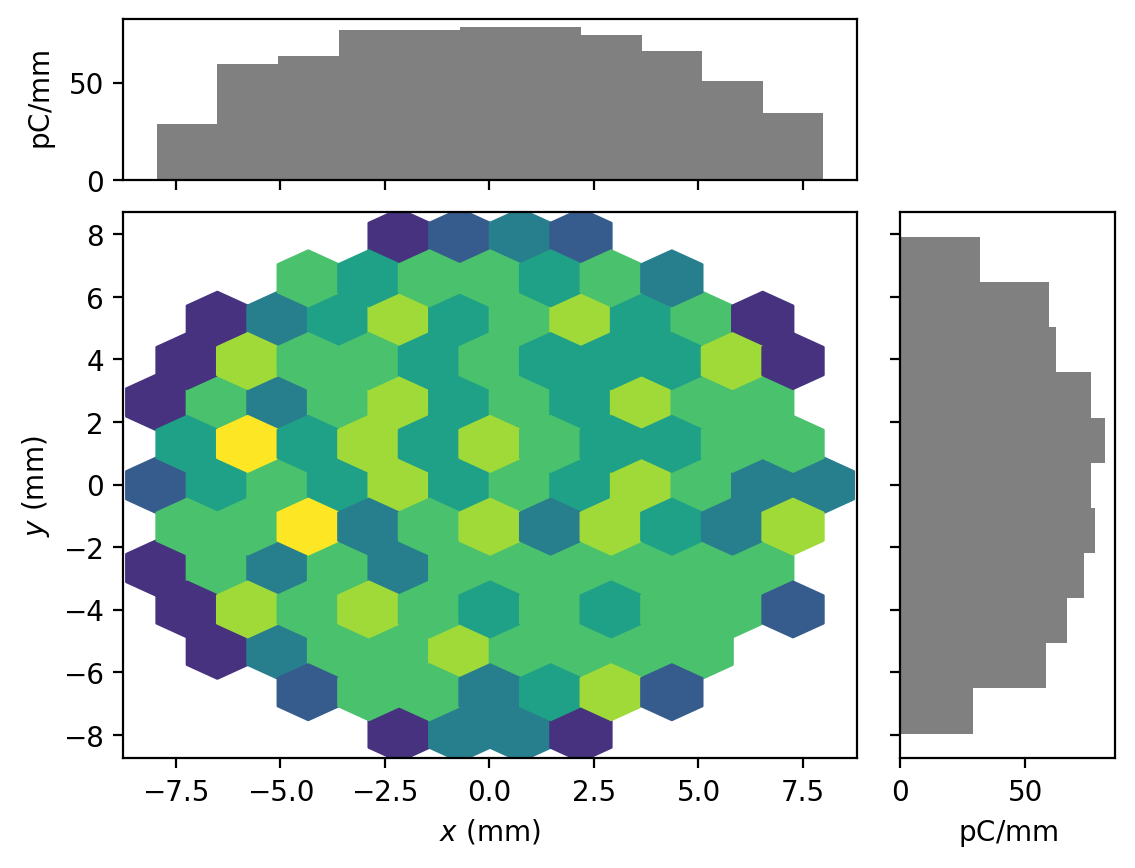

In [8]:
# Down sample particles for speed
gen['n_particle']=500
gen.run()
gen.particles.plot('x', 'y')
G.initial_particles = gen.particles

In [9]:
G.run()

GPT.run_gpt:
   Initial 500 particles written to "/var/folders/jf/c053b9m10035hkwq4wd3bzhr0000gn/T/tmpx79ug305/gpt.particles.gdf"
   Running GPT...
   Writing gpt input file to "/var/folders/jf/c053b9m10035hkwq4wd3bzhr0000gn/T/tmpx79ug305/gpt.in"
   Running with timeout = None sec.
   Loading GPT data from /var/folders/jf/c053b9m10035hkwq4wd3bzhr0000gn/T/tmpx79ug305/gpt.out.gdf
   GDF data loaded, time ellapsed: 0.0957828 (sec).
   Converting tout and screen data to ParticleGroup(s)
   Run finished, total time ellapsed: 4.49855 (sec)


In [10]:
settings['n_particle']=500

G2 = run_gpt_with_distgen(settings,
                          gpt_input_file='templates/cu_injector/gpt.in',
                          distgen_input_file='templates/cu_injector/distgen.in.yaml',
                          verbose=True,
                          auto_phase=True,
                          parse_layout=False
                         )
                          #workdir='templates/cu_injector/temp',
                          #use_tempdir=False)

Run GPT with Distgen:
Ntout is in gpt
gun_voltage is in gpt
buncher_voltage is in gpt
phiCTB01_off is in gpt
cavity_1_voltage is in gpt
cavity_2_voltage is in gpt
cavity_3_voltage is in gpt
cavity_4_voltage is in gpt
cavity_5_voltage is in gpt
A3Quad_1_current is in gpt
A3Quad_2_current is in gpt
A3Quad_3_current is in gpt
n_particle is in distgen
Replacing param n_particle with value 500
Linking particle files, distgen output will point to -> "gpt_particles.gdf" in working directory.
Replacing Distgen output params

Distgen >------

Distribution format: gpt
Output file: /var/folders/jf/c053b9m10035hkwq4wd3bzhr0000gn/T/tmpmpitrby0/gpt_particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 1 nC.
   Number of macroparticles: 500.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 5.65685 mm, power = INF
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super G

In [11]:
settings['n_particle']=500

G3, phase_settings = phase_gpt_with_distgen(settings,
                                            gpt_input_file='templates/cu_injector/gpt.in',
                                            distgen_input_file='templates/cu_injector/distgen.in.yaml',
                                            verbose=True,
                                            parse_layout=False)
                                            
                                            

Run GPT with Distgen:
Ntout is in gpt
gun_voltage is in gpt
buncher_voltage is in gpt
phiCTB01_off is in gpt
cavity_1_voltage is in gpt
cavity_2_voltage is in gpt
cavity_3_voltage is in gpt
cavity_4_voltage is in gpt
cavity_5_voltage is in gpt
A3Quad_1_current is in gpt
A3Quad_2_current is in gpt
A3Quad_3_current is in gpt
n_particle is in distgen
Replacing param n_particle with value 500
Linking particle files, distgen output will point to -> "gpt_particles.gdf" in working directory.
Replacing Distgen output params

Distgen >------

Distribution format: gpt
Output file: /var/folders/jf/c053b9m10035hkwq4wd3bzhr0000gn/T/tmpesowbvgj/gpt_particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 1 nC.
   Number of macroparticles: 500.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 5.65685 mm, power = INF
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super G

In [12]:
phase_settings

{'buncher_voltage': 50.0,
 'cavity_1_voltage': 1000.0,
 'cavity_2_voltage': 1000.0,
 'cavity_3_voltage': 1000.0,
 'cavity_4_voltage': 1000.0,
 'cavity_5_voltage': 1000.0,
 'phiCTB01_0': 133.43209822761364,
 'phiCTC01_0': 49.941093981791056,
 'phiCTC02_0': 23.54303114853647,
 'phiCTC03_0': 272.09181181464726,
 'phiCTC04_0': 293.18258841618103,
 'phiCTC05_0': 197.91143010411403,
 'phiCTB01_off': -90.0,
 'phiCTC01_off': 0.0,
 'phiCTC02_off': 0.0,
 'phiCTC03_off': 0.0,
 'phiCTC04_off': 0.0,
 'phiCTC05_off': 0.0,
 'gammaCTB01': 1.784574019,
 'gammaCTC01': 3.490943427,
 'gammaCTC02': 5.383492167,
 'gammaCTC03': 7.312468671,
 'gammaCTC04': 9.254713717,
 'gammaCTC05': 11.2030769}

In [13]:
G3.run()

GPT.run_gpt:
   Running GPT...
   Writing gpt input file to "/var/folders/jf/c053b9m10035hkwq4wd3bzhr0000gn/T/tmpesowbvgj/gpt.in"
   Running with timeout = 2500 sec.
   Loading GPT data from /var/folders/jf/c053b9m10035hkwq4wd3bzhr0000gn/T/tmpesowbvgj/gpt.out.gdf
   GDF data loaded, time ellapsed: 0.0929523 (sec).
   Converting tout and screen data to ParticleGroup(s)
   Run finished, total time ellapsed: 4.37141 (sec)


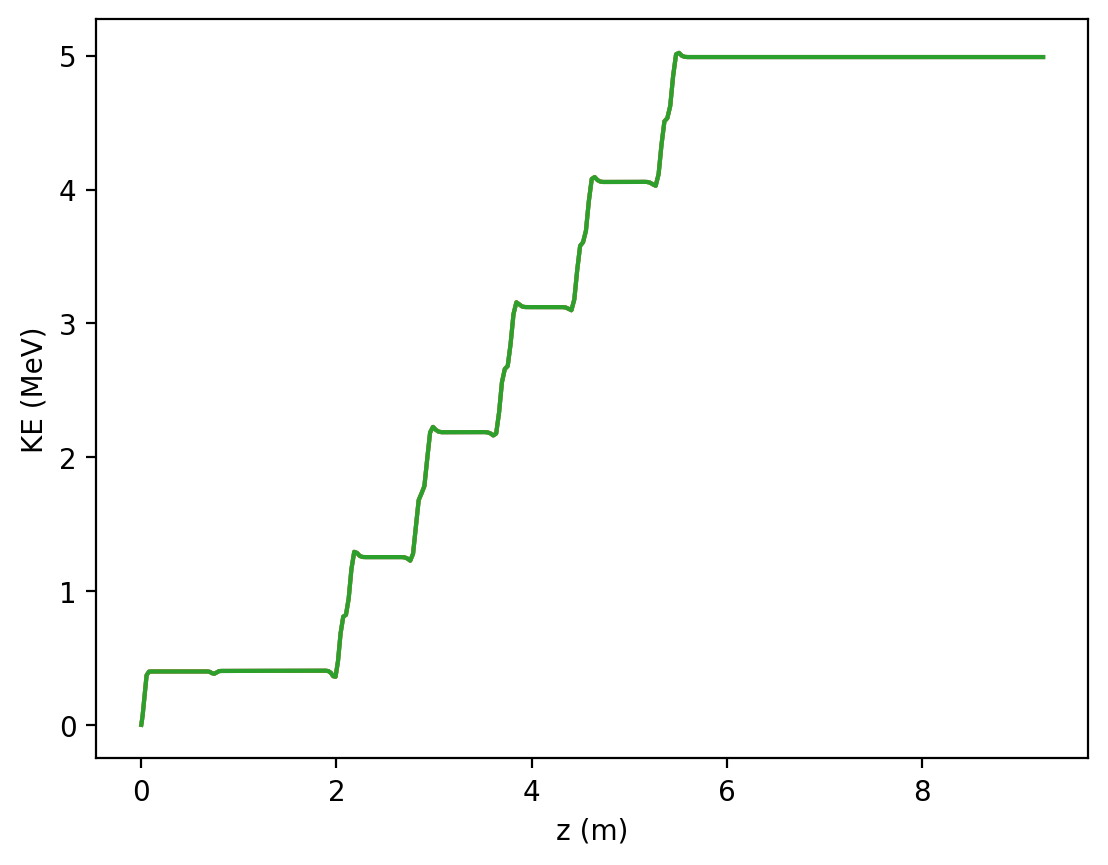

In [14]:
plt.plot(G.tout_stat('mean_z')[:-10], G.tout_stat('mean_kinetic_energy')[:-10]/1e6);
plt.plot(G2.tout_stat('mean_z')[:-10], G2.tout_stat('mean_kinetic_energy')[:-10]/1e6);
plt.plot(G3.tout_stat('mean_z')[:-10], G3.tout_stat('mean_kinetic_energy')[:-10]/1e6);
plt.xlabel('z (m)');
plt.ylabel('KE (MeV)');

#(G2.tout_stat('mean_kinetic_energy')[-10] - G3.tout_stat('mean_kinetic_energy')[-10])/G2.tout_stat('mean_kinetic_energy')[-10]

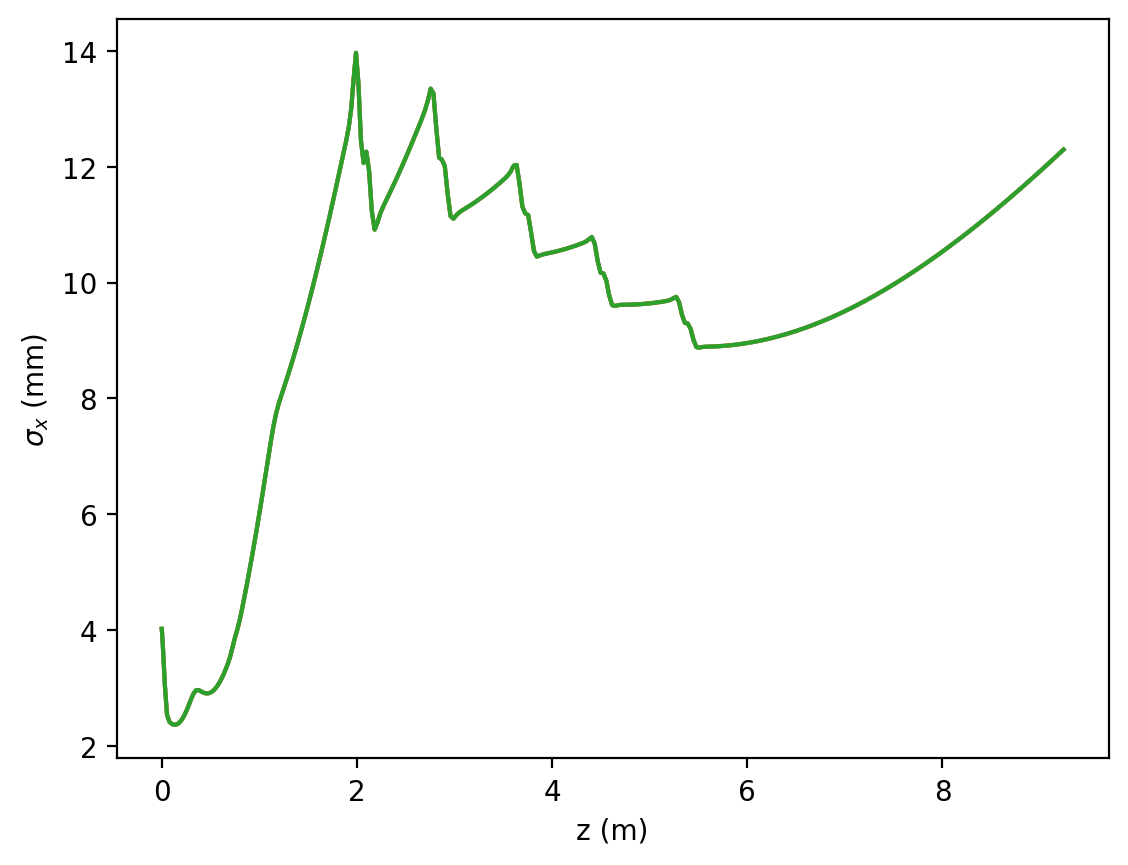

In [15]:
plt.plot(G.tout_stat('mean_z')[:-10], G.tout_stat('sigma_x')[:-10]*1e3);
plt.plot(G2.tout_stat('mean_z')[:-10], G2.tout_stat('sigma_x')[:-10]*1e3);
plt.plot(G3.tout_stat('mean_z')[:-10], G3.tout_stat('sigma_x')[:-10]*1e3);
plt.xlabel('z (m)');
plt.ylabel(r'$\sigma_x$ (mm)');

In [16]:
phases = ['phiCTB01_0', 'phiCTC01_0', 'phiCTC02_0', 'phiCTC03_0', 'phiCTC04_0', 'phiCTC05_0']

for p in phases:
    print(G.input['variables'][p] - G2.input['variables'][p])

0.0
0.0
0.0
0.0
0.0
0.0


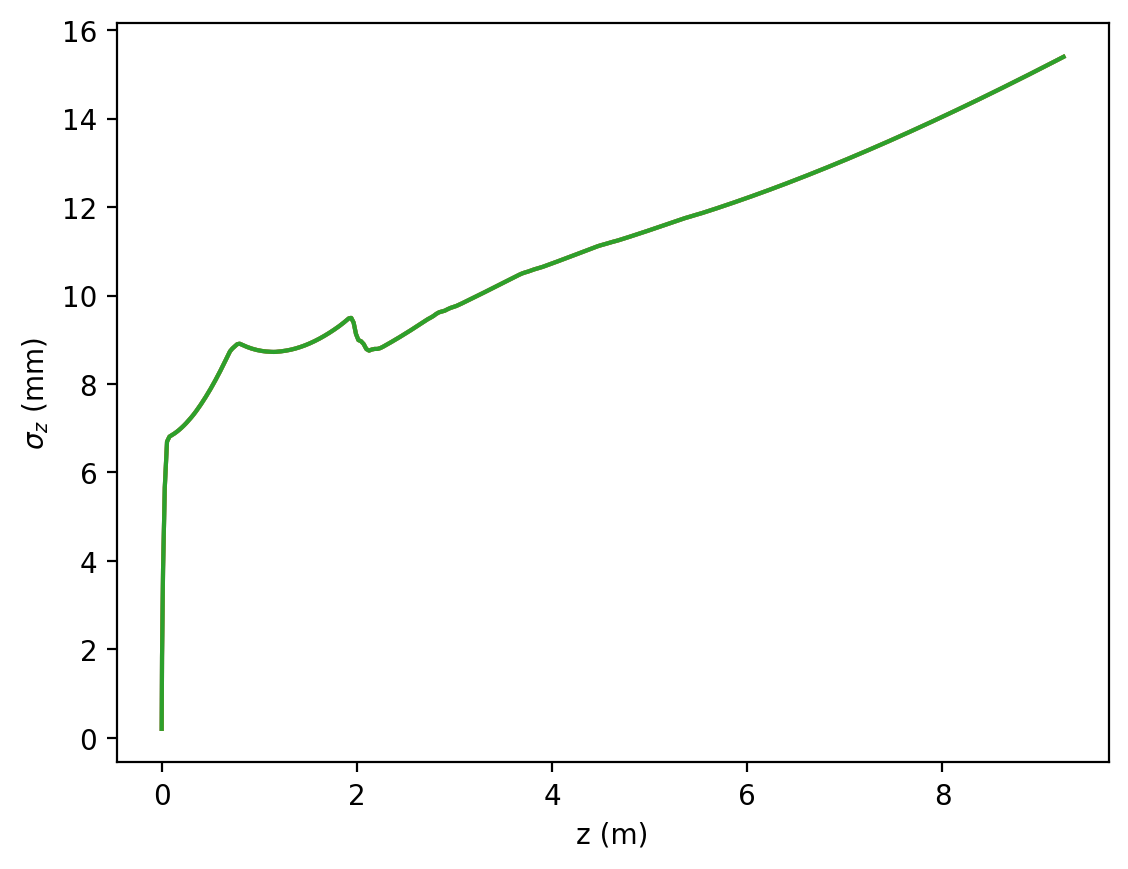

In [17]:
plt.plot(G.tout_stat('mean_z')[:-10], G.tout_stat('sigma_z')[:-10]*1e3);
plt.plot(G2.tout_stat('mean_z')[:-10], G2.tout_stat('sigma_z')[:-10]*1e3);
plt.plot(G3.tout_stat('mean_z')[:-10], G3.tout_stat('sigma_z')[:-10]*1e3);
plt.xlabel('z (m)');
plt.ylabel(r'$\sigma_z$ (mm)');